# Super Store Data Analysis

## Introduction:

Super Store is small retail business located located in the United State.They sell Furniture, Office Supplies and Technology Products and their customers are the mass Consumer,Corporate  and  Home Offices. The data set contains sales, profit and geographical information of individual orders.

Our task is to determine weak areas and opportunities for Super Store to boost business growth.


In [50]:
# Import necessary libraries for data analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [51]:
# Load the Data Set
df=pd.read_csv('D:/Superstore.csv',encoding='latin-1')

In [52]:
# Display the first few rows of the DataFrame
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [53]:
# Display the last few rows of the DataFrame
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [54]:
# Display the shape of the DataFrame.That means How many rows and columns are in DataFrame
df.shape

(9994, 21)

In [55]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [56]:
# Describe the statistical calculation of only numeric columns
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [57]:
# it display all information about dataframe,including Data type ,memory etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [58]:
# check the null value 
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Exploratory Data Analysis

In [59]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [60]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [61]:
#df['Month']=df['Order Date'].dt.month_name()
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year
df['Day']=df['Order Date'].dt.day

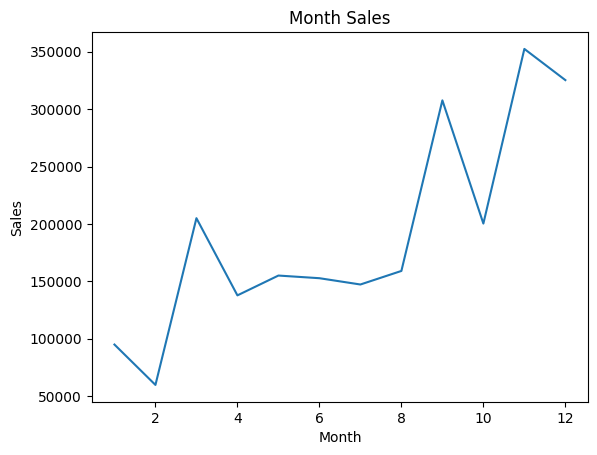

In [62]:
month_wise_sales=df.groupby(df['Month'])['Sales'].sum().reset_index()

sns.lineplot(data=month_wise_sales,x='Month',y=month_wise_sales['Sales'])
plt.title('Month Sales')

plt.show()

## From the above graph we can simply identify the sales over the month duration

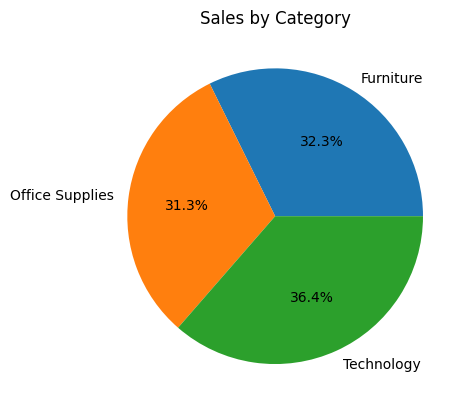

In [63]:
categorysales=df.groupby(df['Category'])['Sales'].sum().reset_index()
plt.pie(x=categorysales['Sales'],labels=categorysales['Category'],autopct='%0.1f%%')
#plt.pie(x=categorysales['Sales'],labels=categorysales.index,autopct='%0.1f%%')
#plt.legend(categorysales['Category'])
plt.title('Sales by Category')
plt.show()

In [64]:
#df['Sub-Category'].unique()

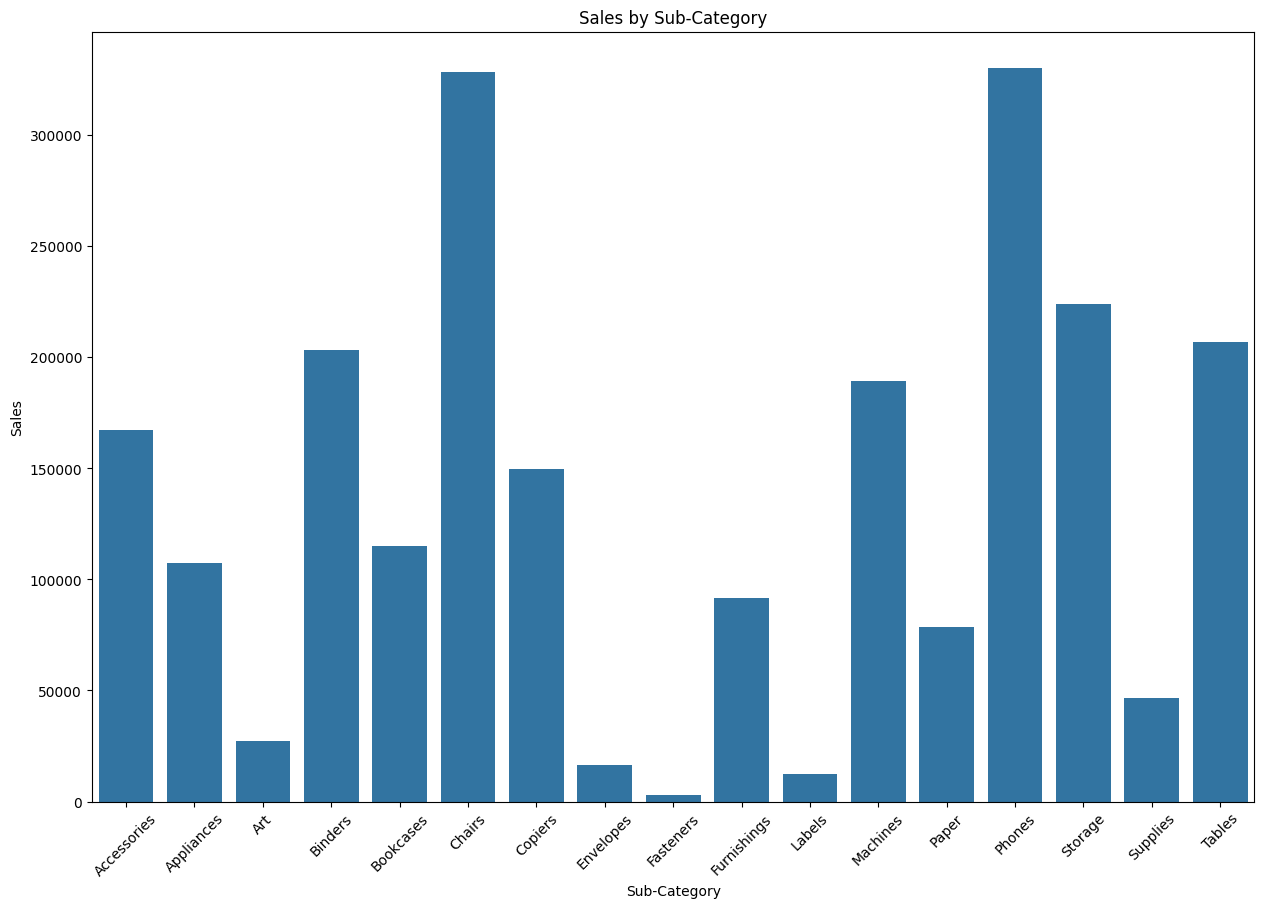

In [65]:
subcategorysales=df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(data=subcategorysales,x='Sub-Category',y='Sales')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)
plt.show()

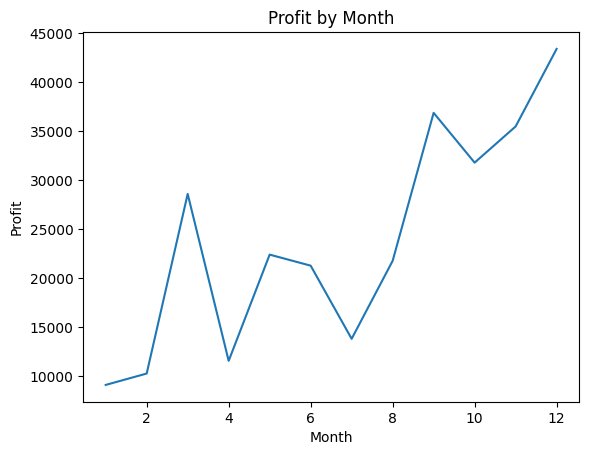

In [66]:

profitbymonth=df.groupby(df['Month'])['Profit'].sum().reset_index()
sns.lineplot(data=profitbymonth,x=profitbymonth['Month'],y='Profit')
plt.title('Profit by Month')
plt.show()


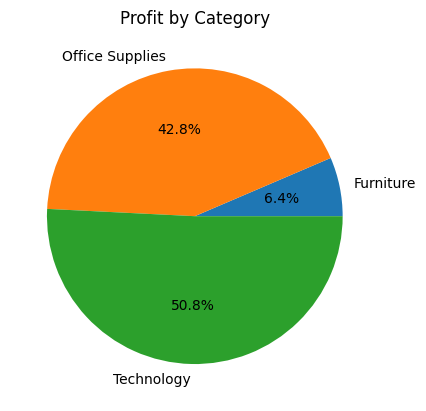

In [67]:
profitbycategory=df.groupby(df['Category'])['Profit'].sum().reset_index()
plt.pie(profitbycategory['Profit'],labels=profitbycategory['Category'],autopct='%0.1f%%')
plt.title('Profit by Category')
plt.show()

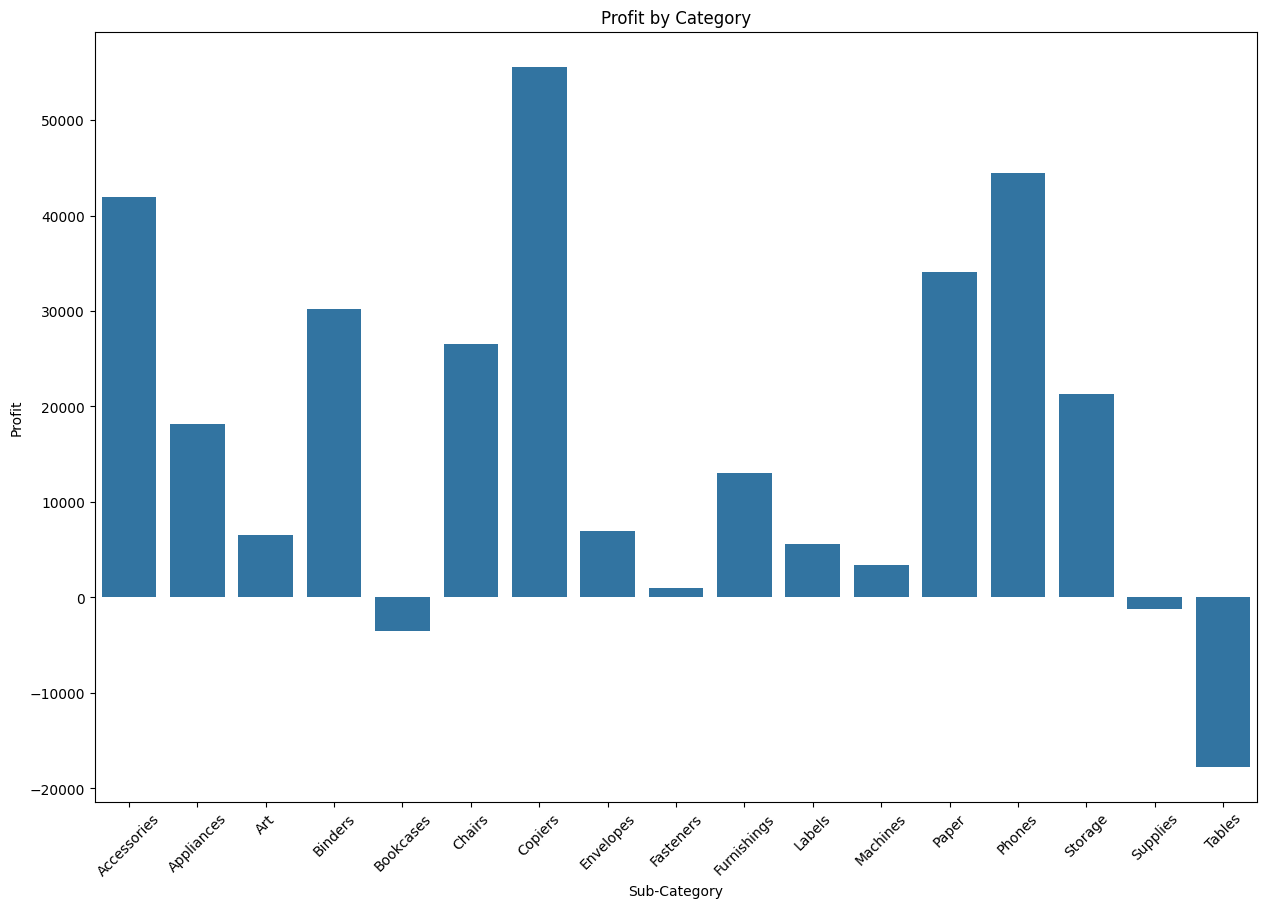

In [68]:
profitbysubcategory=df.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x=profitbysubcategory['Sub-Category'],y='Profit',data=profitbysubcategory,estimator='sum')
plt.title('Profit by Category')
plt.xticks(rotation=45)

plt.show()

In [69]:
#df['Segment'].unique()

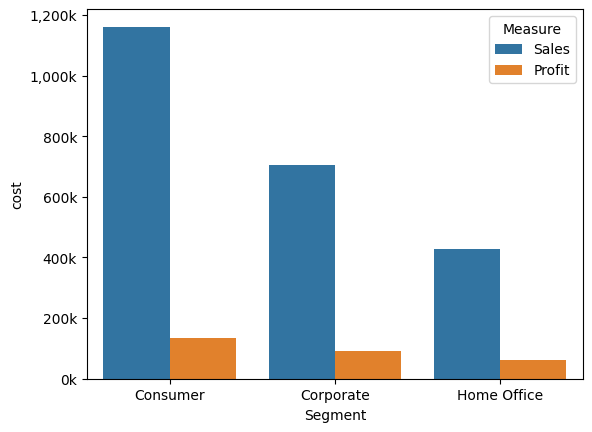

In [70]:
saleandprofit=df.groupby(df['Segment']).agg({'Sales':'sum','Profit':'sum'}).reset_index()
melt=pd.melt(saleandprofit,id_vars=['Segment'],value_vars=['Sales','Profit'],var_name='Measure',value_name='cost')
ax=sns.barplot(data=melt,x='Segment',y='cost',hue='Measure')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}k'.format(x / 1000)))
plt.show()
#sns.barplot(x=('Segment'),y=('Profit'),data=saleandprofit)
#sns.barplot(x=saleandprofit['Segment'],y=saleandprofit['Sales'])

In [71]:
salesprofitratio=df.groupby(df['Segment']).agg({'Sales':'sum','Profit':'sum'}).reset_index()
salesprofitratio['Sales_to_Profit_Ratio']=salesprofitratio['Sales']/salesprofitratio['Profit']
#print(salesprofitratio[['Segment', 'Sales_to_Profit_Ratio']])
print(salesprofitratio[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
